# **Hierarchical Clustering**

In [1]:
# step 1:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# step 2:
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Credit%20Default.csv')

In [20]:
df.head()

,Income,Age,Loan,Loan to Income,Default
0,66155.92510,59.017015,8106.532131,0.122537,0
1,34415.15397,48.117153,6564.745018,0.190752,0
2,57317.17006,63.108049,8020.953296,0.139940,0
3,42709.53420,45.751972,6103.642260,0.142911,0
4,66952.68885,18.584336,8770.099235,0.130990,1


In [21]:
df.Age.astype("int64")

,Age
0,59
1,48
2,63
3,45
4,18
5,57
6,26
7,32
8,55
9,39


In [22]:
df.columns

Index(['Income', 'Age', 'Loan', 'Loan to Income', 'Default'], dtype='object')

In [24]:
X = df[['Income', 'Age', 'Loan', 'Loan to Income' ]]

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
mms = MinMaxScaler()

In [27]:
X_scaled = mms.fit_transform(X)

In [28]:
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

In [30]:
X_scaled['Loan to Income'].min()

0.0

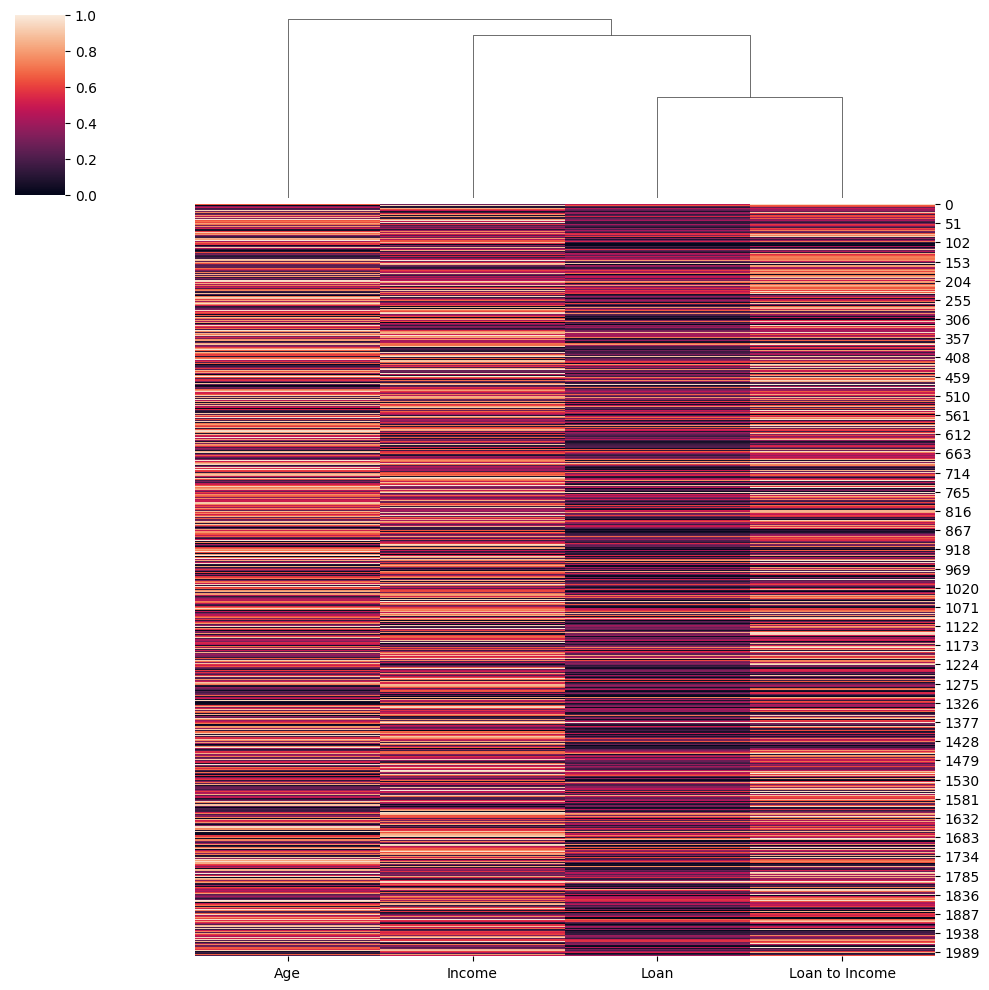

In [31]:
sns.clustermap(X_scaled,row_cluster=False)

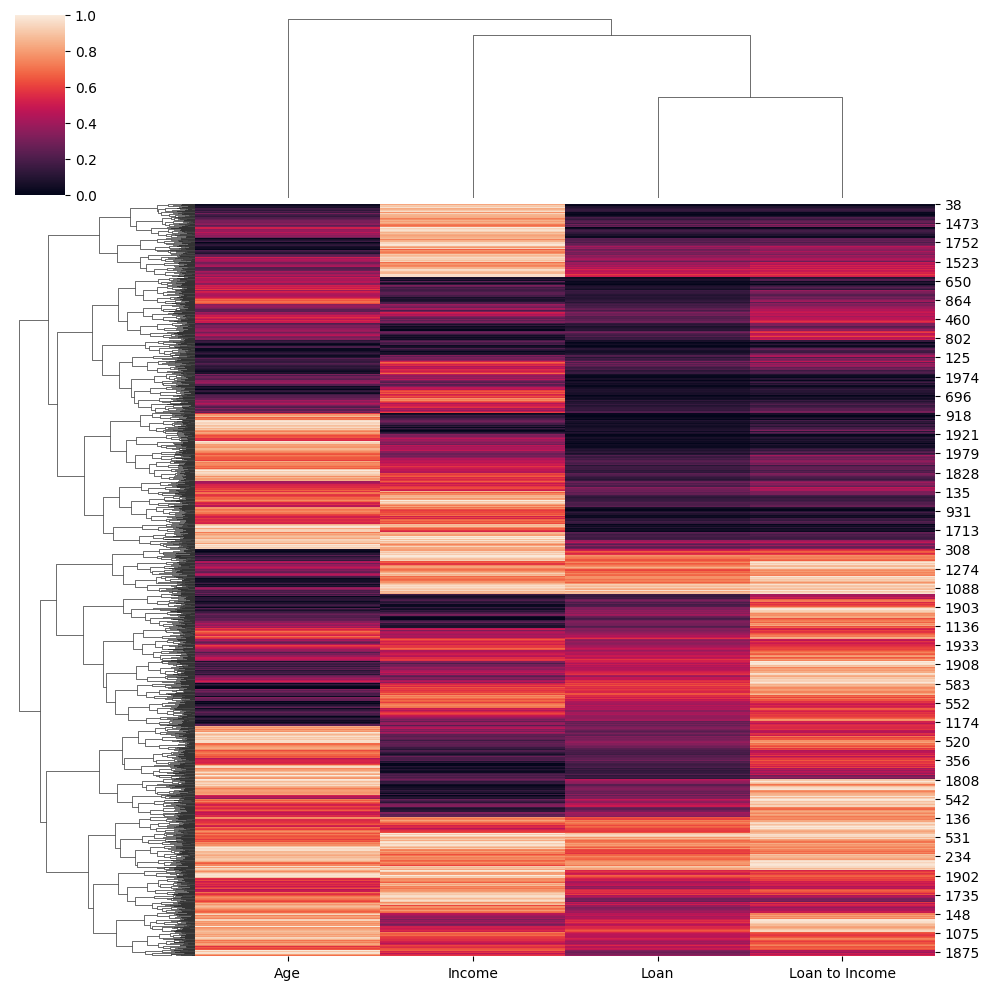

In [32]:
sns.clustermap(X_scaled,row_cluster=True)

In [33]:
from sklearn.cluster import AgglomerativeClustering

In [34]:
model = AgglomerativeClustering(n_clusters=2)

In [35]:
model.fit(X_scaled)

AgglomerativeClustering()

In [17]:
X_new = X.sample(4)
X_new

,Gender,Age,"Annual Income(1,000s)",Spending Score (1-100)
137,0,32,73000,73
114,1,18,65000,48
139,1,35,74000,72
30,0,60,30000,4


In [36]:
cluster_labels = model.fit_predict(X_scaled)
cluster_labels

array([0, 0, 0, ..., 0, 1, 0])

<Axes: xlabel='Age', ylabel='Loan to Income'>

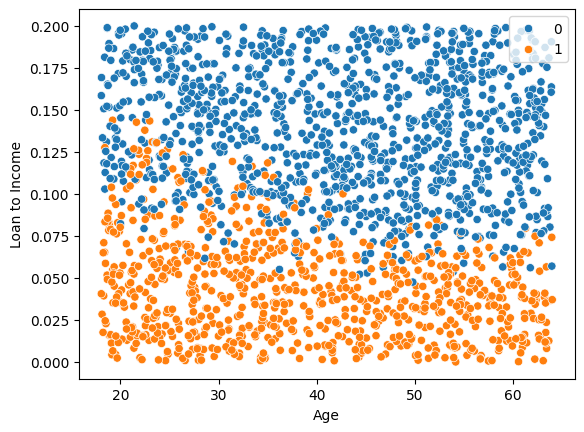

In [38]:
sns.scatterplot(x= 'Age',y='Loan to Income',data=X,hue=cluster_labels)